### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import matplotlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np
import pandas as pd

In [4]:
tf.__version__

'1.12.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [8]:
from keras.datasets import fashion_mnist
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [9]:
# including the class name 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
# Seeing the observation of feature set in test & train data

trainX.shape
testX.shape

(10000, 28, 28)

In [11]:
# Seeing the obseravtion in label data- test & train

trainY.shape
testY.shape

(10000,)

In [12]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [13]:
trainY1 = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY1 = tf.keras.utils.to_categorical(testY, num_classes=10)

In [14]:
print(trainY1.shape)
print('First 5 examples now are: ', trainY1[0:5])


(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
# Scaling TrainX & TestX to a range between '0' & '1'

trainX1 = trainX / 255.0

testX1 = testX / 255.0


### Visualize the data

Plot first 10 images in the triaining set and their labels.

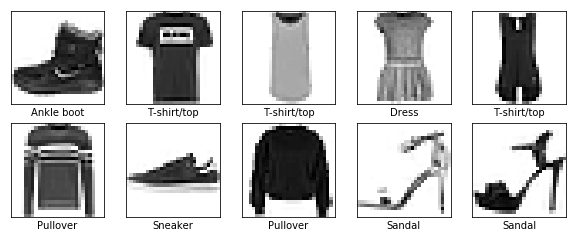

In [39]:
from matplotlib import pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX1[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()            

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [18]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#
#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [19]:
#Compile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [20]:
# Model fit
model.fit(trainX1, trainY1, validation_data=(testX1, testY1), epochs=10,batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.6543 - acc: 0.7868 - val_loss: 0.5502 - val_acc: 0.8143
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.5033 - acc: 0.8299 - val_loss: 0.5231 - val_acc: 0.8174
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4723 - acc: 0.8398 - val_loss: 0.4892 - val_acc: 0.8309
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.4558 - acc: 0.8455 - val_loss: 0.4839 - val_acc: 0.8299
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.4453 - acc: 0.8479 - val_loss: 0.4740 - val_acc: 0.8337
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.4376 - acc: 0.8507 - val_loss: 0.4817 - val_acc: 0.8282
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.4315 - acc: 0.8520 - val_loss: 0.4669 - val_a

### In the above Neural Network model, add Batch Normalization layer after the input layer and repeat the steps.

In [22]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [23]:
#Compile the model 
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [24]:
model.fit(trainX1, trainY1, validation_data=(testX1, testY1), epochs=10, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.6115 - acc: 0.7901 - val_loss: 0.5250 - val_acc: 0.8201
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.5442 - acc: 0.8120 - val_loss: 0.4942 - val_acc: 0.8359
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.5312 - acc: 0.8161 - val_loss: 0.5007 - val_acc: 0.8348
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.5252 - acc: 0.8184 - val_loss: 0.4908 - val_acc: 0.8330
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.5193 - acc: 0.8205 - val_loss: 0.4840 - val_acc: 0.8370
Epoch 6/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.5157 - acc: 0.8215 - val_loss: 0.5060 - val_acc: 0.8335
Epoch 7/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.5159 - acc: 0.8216 - val_loss: 0.5038 - 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [73]:
sdg= keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

In [74]:
#Compile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# running model
model.fit(trainX1, trainY1, validation_data=(testX1, testY1), epochs=10, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.4921 - acc: 0.8283 - val_loss: 0.5038 - val_acc: 0.8387
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.4911 - acc: 0.8284 - val_loss: 0.5064 - val_acc: 0.8369
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.4892 - acc: 0.8295 - val_loss: 0.5197 - val_acc: 0.8270
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.4913 - acc: 0.8262 - val_loss: 0.4940 - val_acc: 0.8391
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4909 - acc: 0.8297 - val_loss: 0.4985 - val_acc: 0.8365
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4918 - acc: 0.8289 - val_loss: 0.5044 - val_acc: 0.8374
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.4884 - acc: 0.8296 - val_loss: 0.5030 - 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [25]:
# Importing Keras & corresponding packages
from keras.layers import Dense

In [26]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


# Initializing Neural net & setting up the parameters for its layer

# Creating the first hidden layer
model.add(tf.keras.layers.Dense(100, activation = 'sigmoid'))

# Creating the second hidden layer
model.add(tf.keras.layers.Dense(100, activation = 'sigmoid'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
##sgd  optimize with sgd optimizer having learning rate 0.03
sgd = keras.optimizers.SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False)

In [28]:
#Compiling the NN using 'sgd' optimizer
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [29]:
# Running model
model.fit(trainX1, trainY1, validation_data=(testX1, testY1), epochs=10, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 1.4436 - acc: 0.5457 - val_loss: 0.8962 - val_acc: 0.7015
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.7422 - acc: 0.7431 - val_loss: 0.6683 - val_acc: 0.7598
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.6070 - acc: 0.7774 - val_loss: 0.5918 - val_acc: 0.7813
Epoch 4/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.5462 - acc: 0.8018 - val_loss: 0.5506 - val_acc: 0.7993
Epoch 5/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.5089 - acc: 0.8167 - val_loss: 0.5191 - val_acc: 0.8135
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.4821 - acc: 0.8273 - val_loss: 0.5013 - val_acc: 0.8185
Epoch 7/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.4620 - acc: 0.8354 - val_loss: 0.

## Review model

In [30]:
# From the above model, it is visible that model accuracy is 85% 


#Prediction using the above model 
predictions = model.predict(testX1)

# Prediction related with first record. 
print(predictions[0])


# Here the best prediction will be the highest value. Let's check that
print(np.argmax(predictions[0]))
# Highest value is coming as 9 


#Testing what is the actual label
print (testY[0])
# Actual label is 9

# Lets print the actual class name corresponding to label
class_names[9]

#So this image is realted with ankel boot

[2.0754647e-05 8.8981251e-06 9.9420140e-05 1.5800141e-04 3.5817934e-06
 1.0698847e-01 6.0280809e-06 1.8024017e-01 4.0841307e-03 7.0839053e-01]
9
9


'Ankle boot'